In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "app_train.csv")
pa_pos = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_pos.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
app_train = app_train.set_index("SK_ID_CURR")
pa_pos = pa_pos.set_index("SK_ID_CURR")

In [5]:
ID_Payback = app_train[app_train["TARGET"] == 0].index.values
ID_Default = app_train[app_train["TARGET"] == 1].index.values

In [6]:
ID_Payback = np.intersect1d(ID_Payback, pa_pos.index.values)
ID_Default = np.intersect1d(ID_Default, pa_pos.index.values)

In [7]:
payback = pa_pos.loc[ID_Payback]
default = pa_pos.loc[ID_Default]

In [8]:
mets = ["PA_AMT_ANNUITY", "PA_AMT_APPLICATION", "PA_AMT_CREDIT", "PA_AMT_DOWN_PAYMENT", "PA_AMT_GOODS_PRICE", "PA_RATE_DOWN_PAYMENT"]

In [9]:
pa_pos.head()

,PA_CNT_CREDITS,PA_POS_CNT_PAYMENTS_LEFT,PA_POS_CNT_DPD,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
158271,1,0.0,0.0,6404.310,58905.000,65124.0,0.000,58905.000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
252457,1,9.0,0.0,4951.350,47056.275,52641.0,4.275,47056.275,0.000088,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
260094,9,70.0,0.0,97839.945,2023469.370,2294779.5,8765.370,2023469.370,0.312513,0.0,1.0,1.0,1.0,1.0,0.0,1.0,4.0,3.0,0.0,4.0,0.0
176456,1,0.0,0.0,14713.605,123486.075,120307.5,12349.575,123486.075,0.101388,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
256657,3,28.0,0.0,60139.575,1115806.500,1277523.0,78714.000,1115806.500,0.699443,2.0,7.0,5.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0


### PA_AMT_ANNUITY

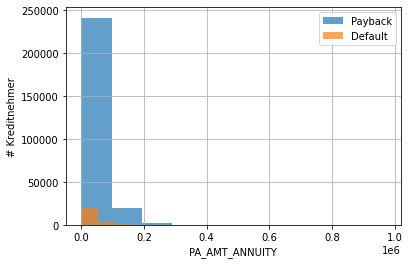

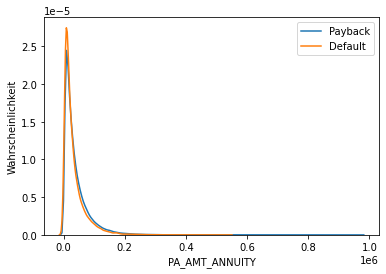

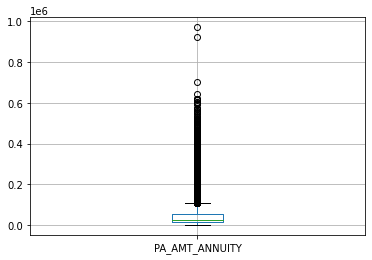

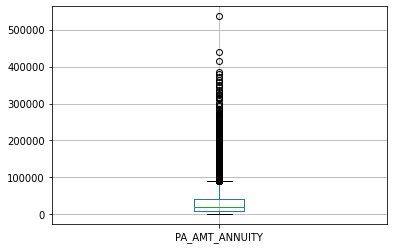

### PA_AMT_APPLICATION

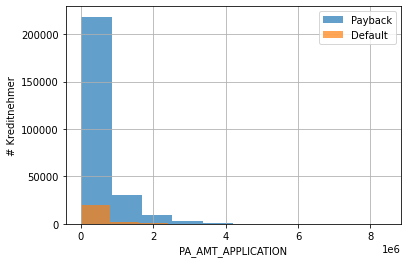

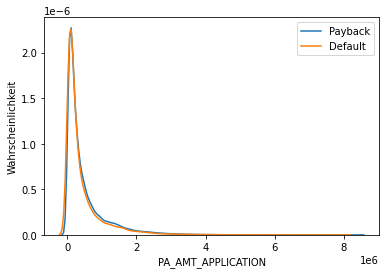

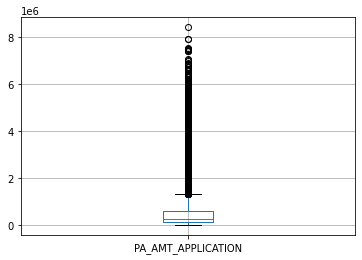

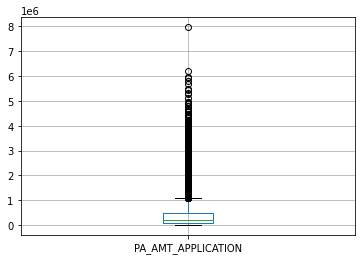

### PA_AMT_CREDIT

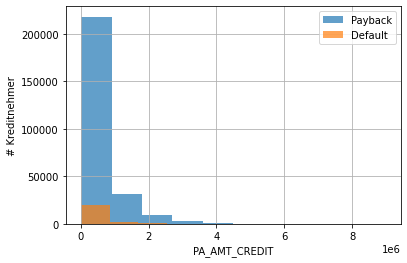

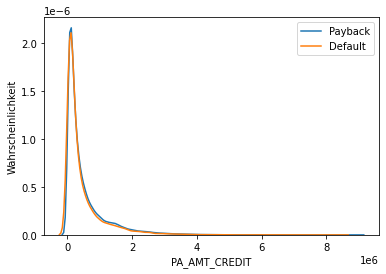

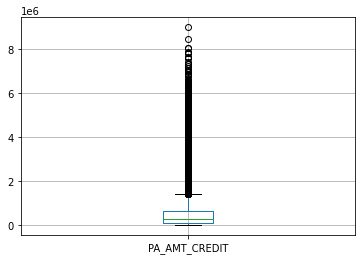

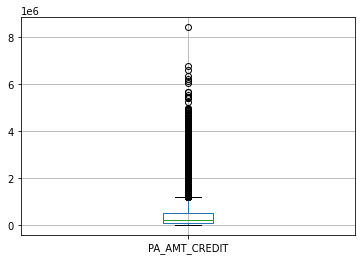

### PA_AMT_DOWN_PAYMENT

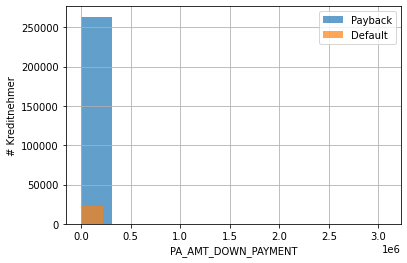

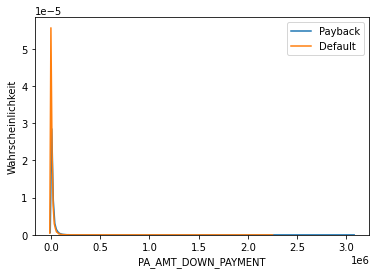

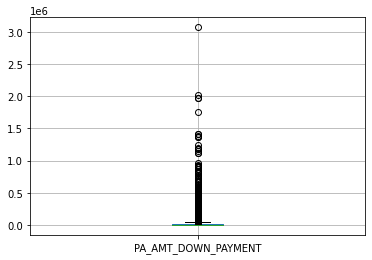

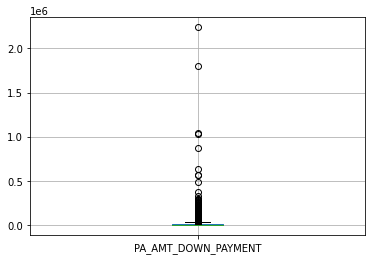

### PA_AMT_GOODS_PRICE

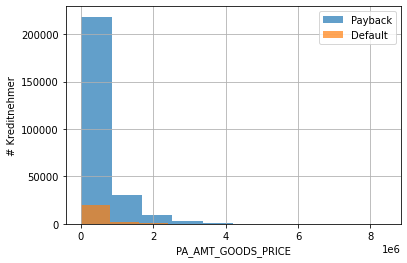

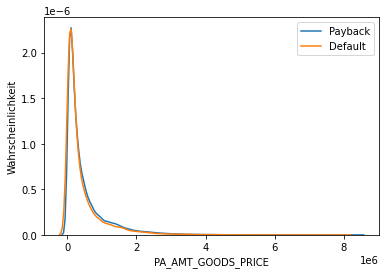

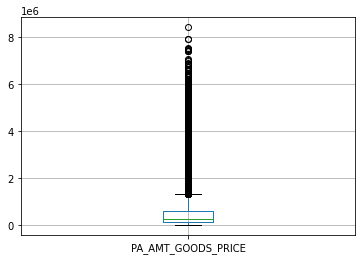

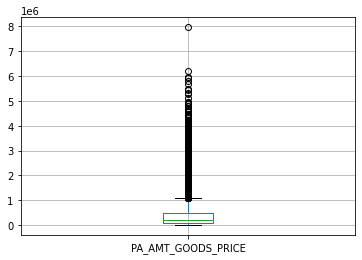

### PA_RATE_DOWN_PAYMENT

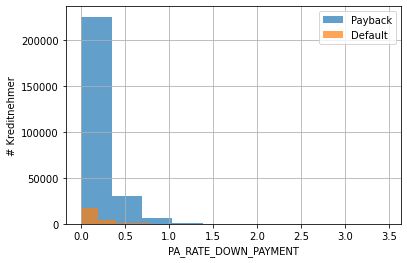

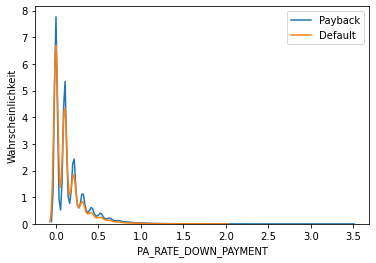

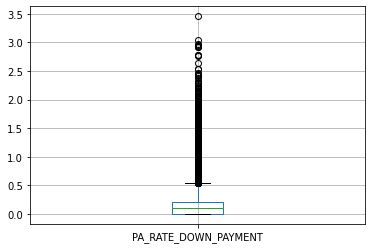

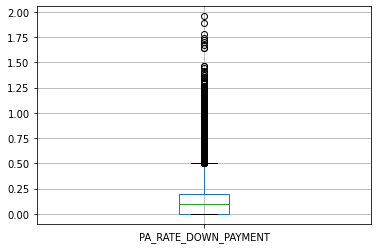

In [10]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()
    
    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()

In [11]:
todo = ["PA_AMT_ANNUITY","PA_AMT_APPLICATION","PA_AMT_CREDIT","PA_AMT_DOWN_PAYMENT","PA_AMT_GOODS_PRICE","PA_RATE_DOWN_PAYMENT"]

In [12]:
pa_pos[todo].head()

,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT
SK_ID_CURR,,,,,,
158271,6404.310,58905.000,65124.0,0.000,58905.000,0.000000
252457,4951.350,47056.275,52641.0,4.275,47056.275,0.000088
260094,97839.945,2023469.370,2294779.5,8765.370,2023469.370,0.312513
176456,14713.605,123486.075,120307.5,12349.575,123486.075,0.101388
256657,60139.575,1115806.500,1277523.0,78714.000,1115806.500,0.699443


PA_AMT_ANNUITY

In [13]:
head = "PA_AMT_ANNUITY"

In [14]:
print(pa_pos[head].quantile(1))
print(pa_pos[head].quantile(0.99))
print(pa_pos[head].quantile(0.95))

971160.435
201306.6081000007
120308.15250000001


In [15]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [16]:
pa_pos.loc[ID_DROP, head] = np.nan

PA_AMT_APPLICATION

In [17]:
head = "PA_AMT_APPLICATION"

In [18]:
print(pa_pos[head].quantile(1))
print(pa_pos[head].quantile(0.99))
print(pa_pos[head].quantile(0.95))

8420040.0
2934000.0
1738327.0500000005


In [19]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [20]:
pa_pos.loc[ID_DROP, head] = np.nan

PA_AMT_CREDIT

In [21]:
head = "PA_AMT_CREDIT"

In [22]:
print(pa_pos[head].quantile(1))
print(pa_pos[head].quantile(0.99))
print(pa_pos[head].quantile(0.95))

8988579.0
3146091.480000002
1870429.0500000003


In [23]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [24]:
pa_pos.loc[ID_DROP, head] = np.nan

PA_AMT_DOWN_PAYMENT

In [25]:
head = "PA_AMT_DOWN_PAYMENT"

In [26]:
print(pa_pos[head].quantile(1))
print(pa_pos[head].quantile(0.99))
print(pa_pos[head].quantile(0.95))

3071272.5
104432.8770000001
49522.378500000006


In [27]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [28]:
pa_pos.loc[ID_DROP, head] = np.nan

PA_AMT_DOWN_PAYMENT

In [29]:
head = "PA_AMT_DOWN_PAYMENT"

In [30]:
print(pa_pos[head].quantile(1))
print(pa_pos[head].quantile(0.95))
print(pa_pos[head].quantile(0.90))

104431.5
45007.236000000026
31500.0


In [31]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.95)].index.values

In [32]:
pa_pos.loc[ID_DROP, head] = np.nan

PA_AMT_GOODS_PRICE

In [33]:
head = "PA_AMT_GOODS_PRICE"

In [34]:
print(pa_pos[head].quantile(1))
print(pa_pos[head].quantile(0.99))
print(pa_pos[head].quantile(0.95))

8420040.0
2934000.0
1738327.0500000005


In [35]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [36]:
pa_pos.loc[ID_DROP, head] = np.nan

PA_RATE_DOWN_PAYMENT

In [37]:
head = "PA_RATE_DOWN_PAYMENT"

In [38]:
print(pa_pos[head].quantile(1))
print(pa_pos[head].quantile(0.99))
print(pa_pos[head].quantile(0.95))

3.4567117419541664
0.9334090397185246
0.5741577455615958


In [39]:
ID_DROP = pa_pos[pa_pos[head] > pa_pos[head].quantile(0.99)].index.values

In [40]:
pa_pos.loc[ID_DROP, head] = np.nan

## Plot Ergebnisse

### PA_AMT_ANNUITY

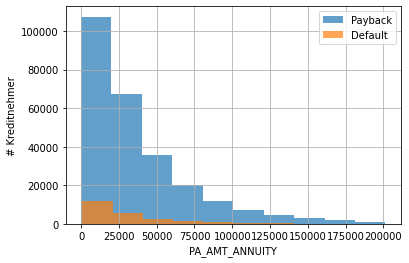

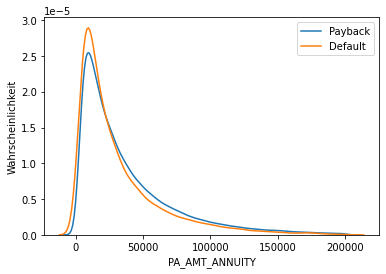

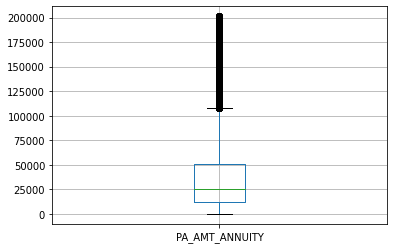

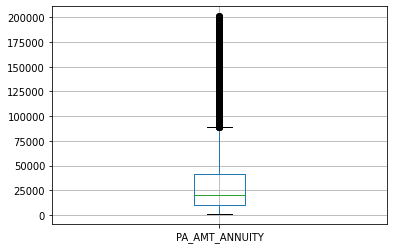

### PA_AMT_APPLICATION

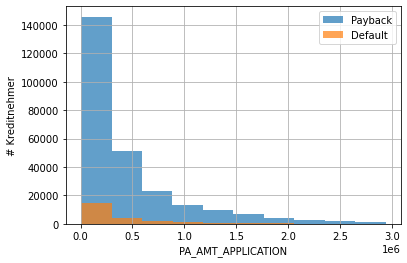

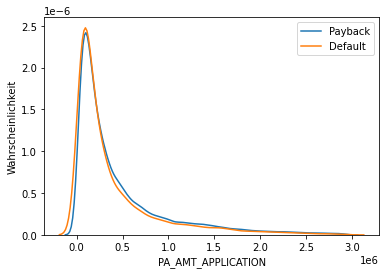

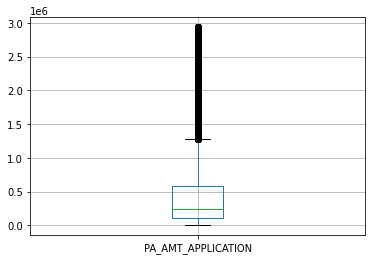

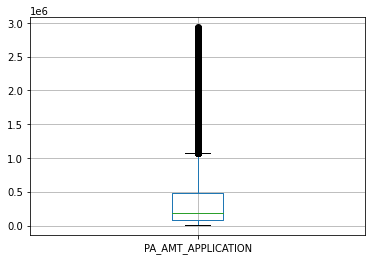

### PA_AMT_CREDIT

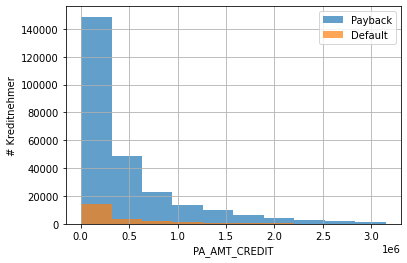

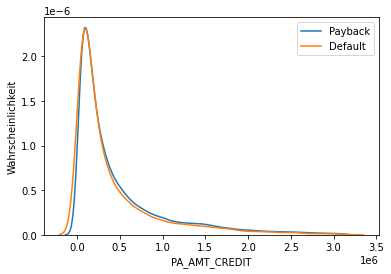

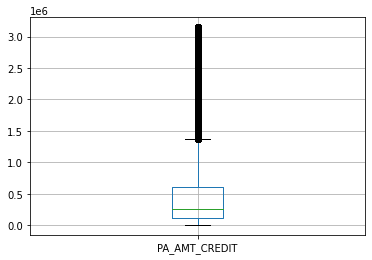

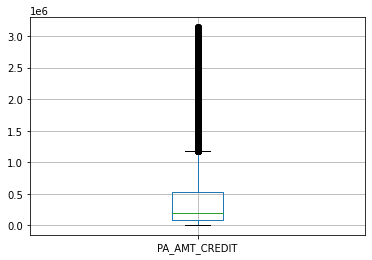

### PA_AMT_DOWN_PAYMENT

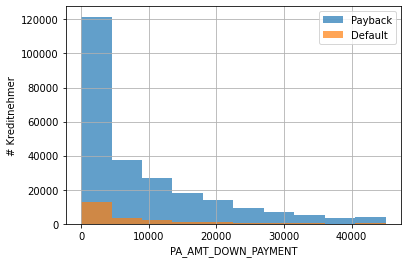

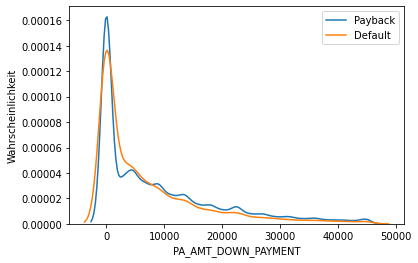

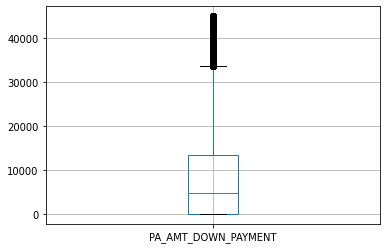

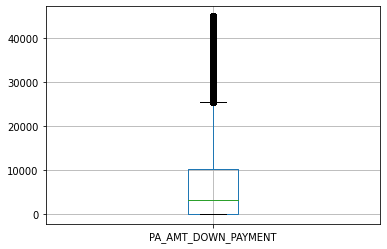

### PA_AMT_GOODS_PRICE

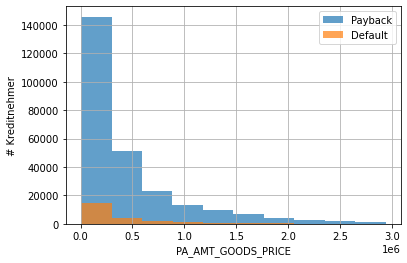

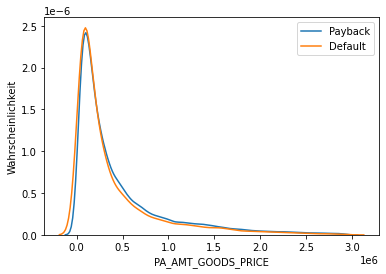

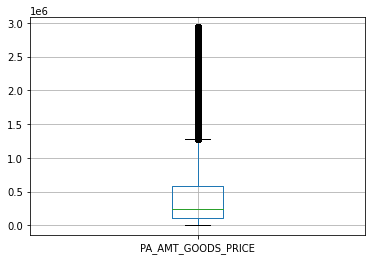

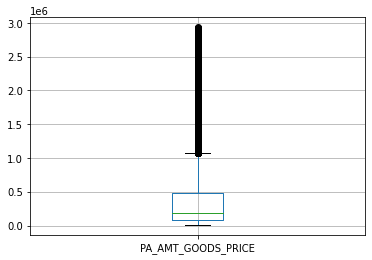

### PA_RATE_DOWN_PAYMENT

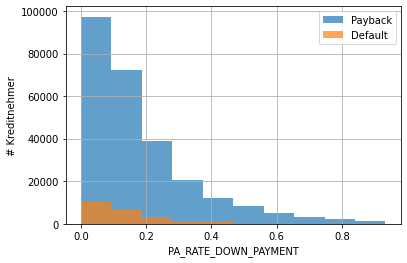

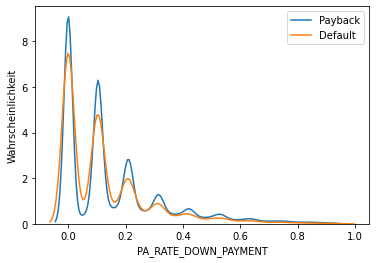

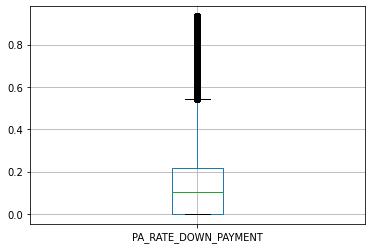

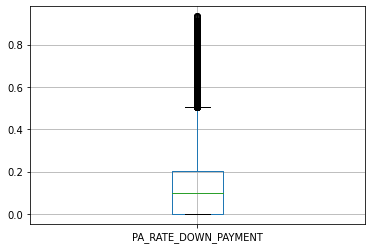

In [41]:
for head in todo:

    display(Markdown("### {head}".format(head=head)))

    payback = pa_pos.loc[ID_Payback]
    default = pa_pos.loc[ID_Default]

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()

    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()


In [42]:
pa_pos.to_csv(DATASET_DIR / "3. Ausreißerbereinigung" / "pa_pos.csv")